# Data Exploration

In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv('./data/sp500_all_financials.csv')

In [3]:
# Dataframe display settings
pd.options.display.max_rows = 100                            #Increases the number of rows displayed without a break in the middle.
pd.options.display.max_columns = 400                         #Increases the number of columns displayed without a break in the middle.
pd.set_option('max_colwidth',100)                            #Increases the width of the columns to display 100 characters at the same time.
pd.set_option('display.float_format', lambda x: '%.3f' % x)  # Formats floats to 3 decimals
pd.set_option('display.float_format', '{:.2f}'.format)       # Alternatively, to display as plain numbers without scientific notation

In [4]:
# Display the first few rows of the dataframe
display(data.head())
display(data.info())

,Quarter,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Total Unusual Items,Total Unusual Items Excluding Goodwill,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,Net Interest Income,Interest Expense,Interest Income,Normalized Income,Net Income From Continuing And Discontinued Operation,Total Expenses,Total Operating Income As Reported,Diluted Average Shares,Basic Average Shares,Diluted EPS,Basic EPS,Diluted NI Availto Com Stockholders,Net Income Common Stockholders,Net Income,Minority Interests,Net Income Including Noncontrolling Interests,Net Income Continuous Operations,Earnings From Equity Interest Net Of Tax,Tax Provision,Pretax Income,Other Income Expense,Other Non Operating Income Expenses,Special Income Charges,Gain On Sale Of Business,Impairment Of Capital Assets,Net Non Operating Interest Income Expense,Interest Expense Non Operating,Interest Income Non Operating,Operating Income,Operating Expense,Research And Development,Selling General And Administration,General And Administrative Expense,Other Gand A,Salaries And Wages,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue,Treasury Shares Number,Ordinary Shares Number,Share Issued,Net Debt,Total Debt,Tangible Book Value,Invested Capital,Working Capital,Net Tangible Assets,Capital Lease Obligations,Common Stock Equity,Total Capitalization,Total Equity Gross Minority Interest,Minority Interest,Stockholders Equity,Gains Losses Not Affecting Retained Earnings,Other Equity Adjustments,Treasury Stock,Retained Earnings,Additional Paid In Capital,Capital Stock,Common Stock,Total Liabilities Net Minority Interest,Total Non Current Liabilities Net Minority Interest,Other Non Current Liabilities,Employee Benefits,Non Current Pension And Other Postretirement Benefit Plans,Tradeand Other Payables Non Current,Non Current Deferred Liabilities,Non Current Deferred Taxes Liabilities,Long Term Debt And Capital Lease Obligation,Long Term Capital Lease Obligation,Long Term Debt,Current Liabilities,Other Current Liabilities,Current Deferred Liabilities,Current Deferred Revenue,Current Debt And Capital Lease Obligation,Current Capital Lease Obligation,Current Debt,Other Current Borrowings,Line Of Credit,Commercial Paper,Pensionand Other Post Retirement Benefit Plans Current,Payables And Accrued Expenses,Current Accrued Expenses,Payables,Total Tax Payable,Income Tax Payable,Accounts Payable,Total Assets,Total Non Current Assets,Other Non Current Assets,Defined Pension Benefit,Non Current Deferred Assets,Non Current Deferred Taxes Assets,Non Current Accounts Receivable,Investments And Advances,Investmentin Financial Assets,Long Term Equity Investment,Goodwill And Other Intangible Assets,Other Intangible Assets,Goodwill,Net PPE,Accumulated Depreciation,Gross PPE,Construction In Progress,Other Properties,Machinery Furniture Equipment,Buildings And Improvements,Land And Improvements,Properties,Current Assets,Other Current Assets,Hedging Assets Current,Restricted Cash,Prepaid Assets,Inventory,Finished Goods,Work In Process,Raw Materials,Receivables,Other Receivables,Accounts Receivable,Allowance For Doubtful Accounts Receivable,Gross Accounts Receivable,Cash Cash Equivalents And Short Term Investments,Other Short Term Investments,Cash And Cash Equivalents,Free Cash Flow,Repurchase Of Capital Stock,Repayment Of Debt,Issuance Of Debt,Issuance Of Capital Stock,Capital Expenditure,Interest Paid Supplemental Data,Income Tax Paid Supplemental Data,End Cash Position,Beginning Cash Position,Effect Of Exchange Rate Changes,Changes In Cash,Financing Cash Flow,Cash Flow From Continuing Financing Activities,Net Other Financing Charges,Proceeds From Stock Option Exercised,Cash Dividends Paid,Common Stock Dividend Paid,Net Common Stock Issuance,Common Stock Payments,Common Stock Issuance,Net Issuance Payments Of Debt,Ne

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Columns: 343 entries, Quarter to Interest Paid Cfo
dtypes: float64(334), int64(1), object(8)
memory usage: 1.3+ MB


None

In [5]:
# Check for missing values in the 'Total Revenue' and handle them if necessary
print("Missing 'Total Revenue' data:", data['Total Revenue'].isnull().sum())
#data['Total Revenue'].fillna(0, inplace=True)  # Replace NaNs with zero if applicable

Missing 'Total Revenue' data: 3


In [6]:
# Aggregating Total Revenue by GICS Sector
sector_revenue = data.groupby('GICS Sector')['Total Revenue'].sum()

In [7]:
# Aggregating Total Revenue by GICS Sector
sector_revenue = data.groupby('GICS Sector')['Total Revenue'].sum()

In [8]:
# Aggregating Total Revenue by GICS Sub-Industry
subsector_revenue = data.groupby('GICS Sub-Industry')['Total Revenue'].sum().sort_values(ascending=False)

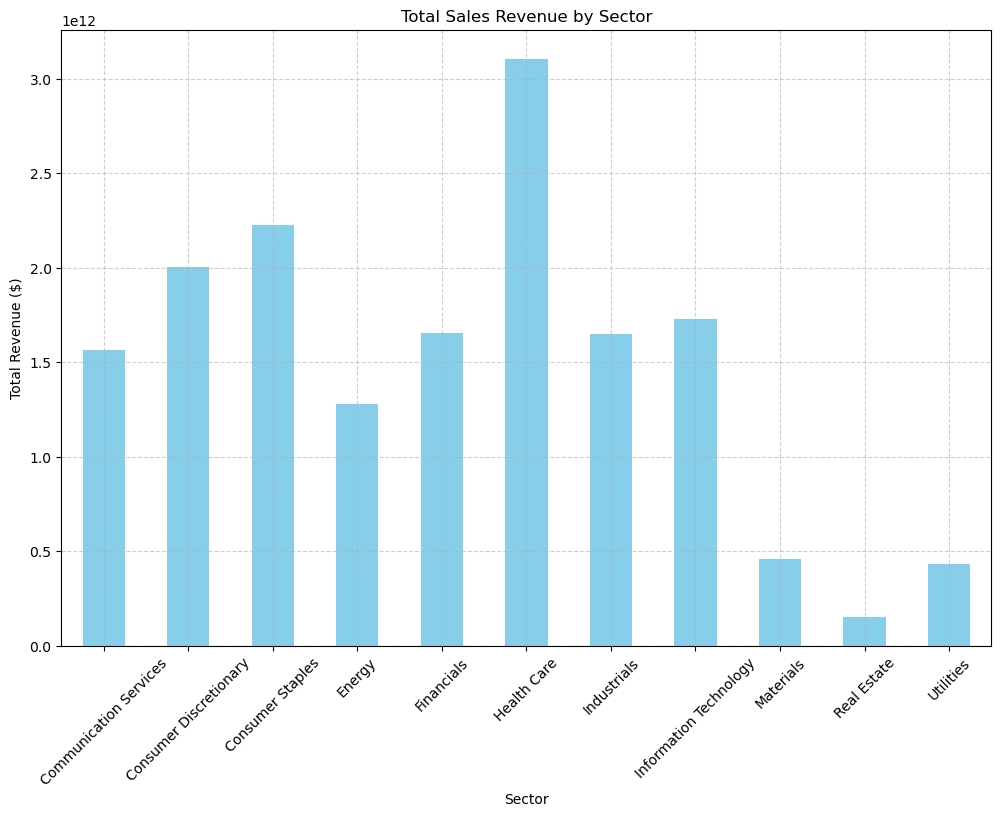

In [9]:
# Plotting the Total Revenue by Sector
plt.figure(figsize=(12, 8))
sector_revenue.plot(kind='bar', color='skyblue')
plt.title('Total Sales Revenue by Sector')
plt.ylabel('Total Revenue ($)')
plt.xlabel('Sector')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

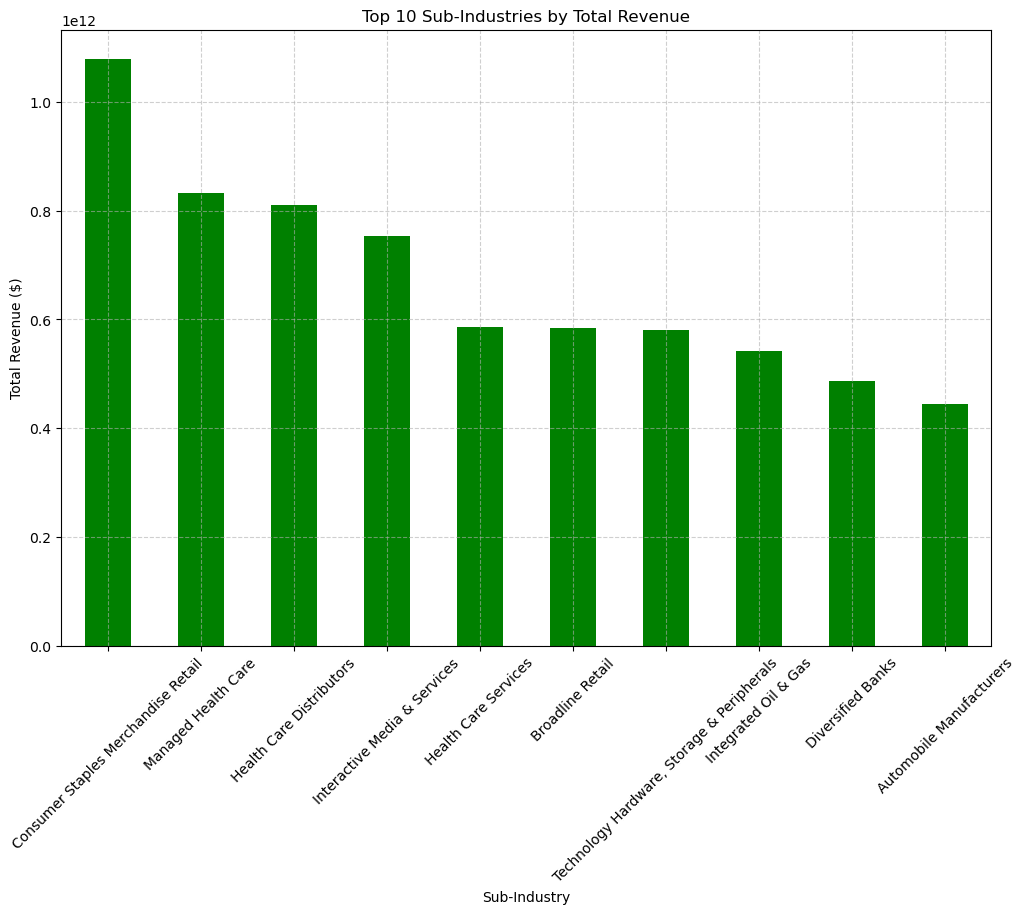

In [10]:
# Plotting the Top 10 Sub-Industries by Total Revenue
plt.figure(figsize=(12, 8))
subsector_revenue.head(10).plot(kind='bar', color='green')
plt.title('Top 10 Sub-Industries by Total Revenue')
plt.ylabel('Total Revenue ($)')
plt.xlabel('Sub-Industry')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [11]:
# Display the numerical data for sectors
print("Total Sales Revenue by Sector:")
print(sector_revenue)

# Display the numerical data for top 10 sub-industries
print("Total Sales Revenue by Top 10 Sub-Industries:")
print(subsector_revenue.head(10))

Total Sales Revenue by Sector:
GICS Sector
Communication Services   1567159974000.00
Consumer Discretionary   2005333607000.00
Consumer Staples         2228546838000.00
Energy                   1281222282000.00
Financials               1655026263000.00
Health Care              3102797148000.00
Industrials              1650097890000.00
Information Technology   1728830635000.00
Materials                 461101887429.39
Real Estate               154438381000.00
Utilities                 435091365000.00
Name: Total Revenue, dtype: float64
Total Sales Revenue by Top 10 Sub-Industries:
GICS Sub-Industry
Consumer Staples Merchandise Retail          1079285409000.00
Managed Health Care                           833318000000.00
Health Care Distributors                      810290411000.00
Interactive Media & Services                  753054504000.00
Health Care Services                          586516747000.00
Broadline Retail                              584897000000.00
Technology Hardware, St

In [12]:
STOP

NameError: name 'STOP' is not defined

### Total Revenue & Total Expenses for each company on the S&P 500h compnay in the S&P 500. 

In [5]:
# Pull relevant sectors
df = data[['Symbol','Security','GICS Sector','Total Revenue','Total Expenses']]


### Look for Nan Values in the dataframe with a mask

In [11]:
df.isna()

,Symbol,Security,GICS Sector,Total Revenue,Total Expenses,Total Net Income
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
495,False,False,False,False,False,False
496,False,False,False,False,False,False
497,False,False,False,False,False,False
498,False,False,False,False,False,False


In [20]:
#df.loc[df.isna()]

df.loc[df.isna().any(axis=1)]

,Symbol,Security,GICS Sector,Total Revenue,Total Expenses
27,AXP,American Express,Financials,60363000000.00,NaN
49,ADSK,Autodesk,Information Technology,NaN,NaN
57,BAC,Bank of America,Financials,98581000000.00,NaN
58,BK,BNY Mellon,Financials,17293000000.00,NaN
67,BX,Blackstone Inc.,Financials,7006649000.00,NaN
84,COF,Capital One,Financials,36787000000.00,NaN
100,SCHW,Charles Schwab Corporation,Financials,18837000000.00,NaN
110,C,Citigroup,Financials,78486000000.00,NaN
111,CFG,Citizens Financial Group,Financials,8224000000.00,NaN
148,DFS,Discover Financial,Financials,15860000000.00,NaN


### Check the number of rows with NaN's in the dataframe

In [23]:
print('There are {} rows with NaN values in them.'.format(len(df.loc[df.isna().any(axis=1)])))

There are 29 rows with NaN values in them.


### Drop the NaN values

In [24]:
# For simplicity drop NaN values
df = df.dropna()
df.head()

,Symbol,Security,GICS Sector,Total Revenue,Total Expenses
0,MMM,3M,Industrials,32681000000.00,41716000000.00
1,AOS,A. O. Smith,Industrials,3852800000.00,3095400000.00
2,ABT,Abbott Laboratories,Health Care,40109000000.00,33631000000.00
3,ABBV,AbbVie,Health Care,54318000000.00,40783000000.00
4,ACN,Accenture,Information Technology,64111745000.00,55301856000.00


### Calculate Total Net Income

In [9]:
df['Total Net Income'] = df['Total Revenue'] - df['Total Expenses']
df.head()

,Symbol,Security,GICS Sector,Total Revenue,Total Expenses,Total Net Income
0,MMM,3M,Industrials,32681000000.00,41716000000.00,-9035000000.00
1,AOS,A. O. Smith,Industrials,3852800000.00,3095400000.00,757400000.00
2,ABT,Abbott Laboratories,Health Care,40109000000.00,33631000000.00,6478000000.00
3,ABBV,AbbVie,Health Care,54318000000.00,40783000000.00,13535000000.00
4,ACN,Accenture,Information Technology,64111745000.00,55301856000.00,8809889000.00


NameError: name 'STOP' is not defined

In [ ]:
total_revenue.loc[total_revenue['Total Revenue'].isna()]

In [ ]:
# Find the number of GICS sectors
data['GICS Sector'].value_counts().head(20)

In [ ]:
num_sub_industries = data['GICS Sub-Industry'].value_counts()
num_sub_industries.head(50)

In [ ]:
for col in data.columns.to_list():
    print(col)

In [ ]:
# Display summary statistics
data.describe()

In [ ]:
# Checking for any missing values
missing_data = data.isnull().sum()
print("Column Name".ljust(70), "Missing Values")  # Adjust the number to your needs
for index, value in missing_data.items():
    # only print values missing values
    if value > 0:
        print(index.ljust(70), value)  # Use ljust to align text to the left with a fixed width